# **Bank Churn Prediction using Machine Learning**
> (pyTorch, XGBoost, LightGBM, CatBoost, Random Forest)

# Team Members:

1. `Muhammad Aammar Tufail` (Ph.D.)
2. `Nawar Habboush`
3. `Abdullah Al Amin`
4. `Maximilian Beikrich`

## `Overview`

> The competition is hosted by the `Kaggle` platform at the following link: [Bank Customer Churn Prediction](https://www.kaggle.com/competitions/playground-series-s4e1/overview). 

In this competition, we are tasked with predicting bank customer churn based on a unique dataset. This dataset has been synthetically generated by a deep learning model, which was initially trained on the original Bank Customer Churn Prediction dataset. While the features mirror the original to a degree, subtle differences exist that may influence model predictions.

## `Objective`

### **Purpose**

- **Perform Comprehensive EDA**
- **Predict Customer Churn**

The challenge is to not only develop a predictive model with high accuracy for customer churn but also to identify and leverage the nuances between the synthetic and original datasets. Competitors are encouraged to explore the original dataset alongside the provided one, examining the disparities and potentially utilizing it to enhance model robustness and performance.

## `Strategy`
My approach will involve a thorough exploratory data analysis to compare the synthetic and original datasets, hypothesis testing to understand feature relationships, and experimenting with various machine learning algorithms. The goal is to create a model that not only excels with the competition data but also gains insights from the original dataset to improve prediction outcomes.

## `Data Description`

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

1. `Customer ID:` A unique identifier for each customer
2. `Surname:` The customer's surname or last name
3. `Credit Score:` A numerical value representing the customer's credit score
4. `Geography:` The country where the customer resides
   - France 
   - Spain 
   - Germany
5. `Gender:` The customer's gender
   - Male
   - Female
6. `Age:` The customer's age.
7. `Tenure:` The number of years the customer has been with the bank
8. `Balance:` The customer's account balance
9.  `NumOfProducts:` The number of bank products the customer uses (e.g., savings account, credit card)
10. `HasCrCard:` Whether the customer has a credit card 
    - 1 = yes 
    - 0 = no
11. `IsActiveMember:` Whether the customer is an active member
    - 1 = yes 
    - 0 = no
12. `EstimatedSalary:` The estimated salary of the customer
13. `Exited:` Whether the customer has churned
    - 1 = yes 
    - 0 = no

In [1]:
# Let's start by importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from scipy.stats import skew, kurtosis
#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [4]:
# shape of the dataset
print(f'The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')

The dataset has 165034 rows and 14 columns


In [5]:
df_train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# print the column names
print(f'The columns in the dataset are\n{df_train.columns.values}')

The columns in the dataset are
['id' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender' 'Age'
 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


Let's explore the data and see what we can find column by column.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
# print the outputs in a tabular format
print(tabulate({'Column Name': df_train.columns, 'Data Type': df_train.dtypes,
                'No. of Missing Values': df_train.isnull().sum(),
                'No. of Unique Values': df_train.nunique()},headers='keys'))

Column Name      Data Type      No. of Missing Values    No. of Unique Values
---------------  -----------  -----------------------  ----------------------
id               int64                              0                  165034
CustomerId       int64                              0                   23221
Surname          object                             0                    2797
CreditScore      int64                              0                     457
Geography        object                             0                       3
Gender           object                             0                       2
Age              float64                            0                      71
Tenure           int64                              0                      11
Balance          float64                            0                   30075
NumOfProducts    int64                              0                       4
HasCrCard        float64                            0           

### `Find Duplicates`

In [9]:
print("The duplicated rows in train dataframe are:",df_train.duplicated().sum(),"\n")
print("The duplicated rows in test dataframe are:",df_test.duplicated().sum())

The duplicated rows in train dataframe are: 0 

The duplicated rows in test dataframe are: 0


> There are no duplicates in the dataset.

In [10]:
# drop id and customer id columns from the dataset
df_train.drop(['id','CustomerId', 'Surname'], axis=1, inplace=True)

In [11]:
# select all categorical columns where the data type is object or category
cat_cols = [col for col in df_train.columns if df_train[col].dtype in ['object', 'category']]
# print(f'The categorical columns are {cat_cols}')
# select all numerical columns
num_cols = [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64']]
# print(f'The numerical columns are {num_cols}')

# print the outputs in a tabular format
print(tabulate({'Categorical Columns' : cat_cols,
                'Numeric Columns' : num_cols},headers='keys'))

Categorical Columns    Numeric Columns
---------------------  -----------------
Geography              CreditScore
Gender                 Age
                       Tenure
                       Balance
                       NumOfProducts
                       HasCrCard
                       IsActiveMember
                       EstimatedSalary
                       Exited


### `Identify the continuous numerical columns`

In [12]:
# display the unique values of each feature in the train dataframe
df_train.nunique().sort_values(ascending=False)

EstimatedSalary    55298
Balance            30075
CreditScore          457
Age                   71
Tenure                11
NumOfProducts          4
Geography              3
Gender                 2
HasCrCard              2
IsActiveMember         2
Exited                 2
dtype: int64

#### `Observations:`
1. As we can see that the feature `Id` has 165034 unique values which is equal to the number of rows in the dataset. This means that the feature `Id` is unique for each row and does not provide any useful information for the model. Hence, we can drop this feature from the dataset.
2. `CustomerID` is also having some unique values.

So, we have only following columns as continuous numerical columns:
- `CreditScore`
- `Age`
- `Balance` 
- `EstimatedSalary`

In [13]:
continuous_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

> Let's have a look on the statistical summary of these columns.

In [14]:
df_train[continuous_features].describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,165034.0,656.454373,80.103340,350.00,597.00,659.0,710.0000,850.00
Age,165034.0,38.125888,8.867205,18.00,32.00,37.0,42.0000,92.00
Balance,165034.0,55478.086689,62817.663278,0.00,0.00,0.0,119939.5175,250898.09
EstimatedSalary,165034.0,112574.822734,50292.865585,11.58,74637.57,117948.0,155152.4675,199992.48


### `Customers with Zero Balance`

In [15]:
# find the number of observation where the balance is 0
zero_balance_customers = df_train[df_train['Balance'] == 0].shape[0]
print("There are", zero_balance_customers ,"("+ str(round((zero_balance_customers/len(df_train))*100)) + "%) customers having no/zero balance in their accounts.")

There are 89648 (54%) customers having no/zero balance in their accounts.


&emsp;**Observations**
> - `More than 50%` of the customers `with zero balance`, representing the `high biasness` in the `Balance` feature.
>
> - Summary represents that there are `no anomalies in other features`.

&emsp;**Plot the Distributions & Boxplots of the Continuous Numeric Features**

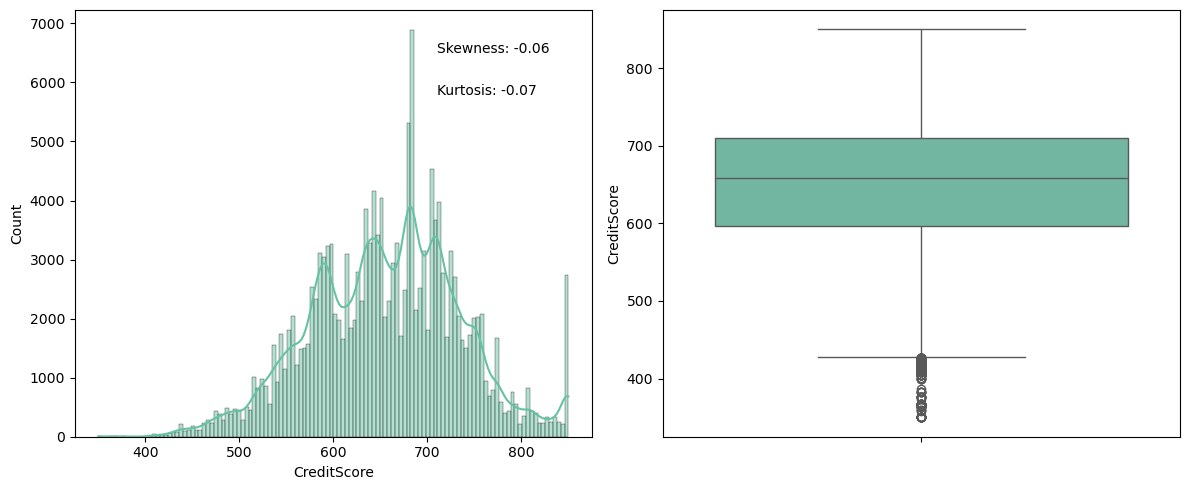

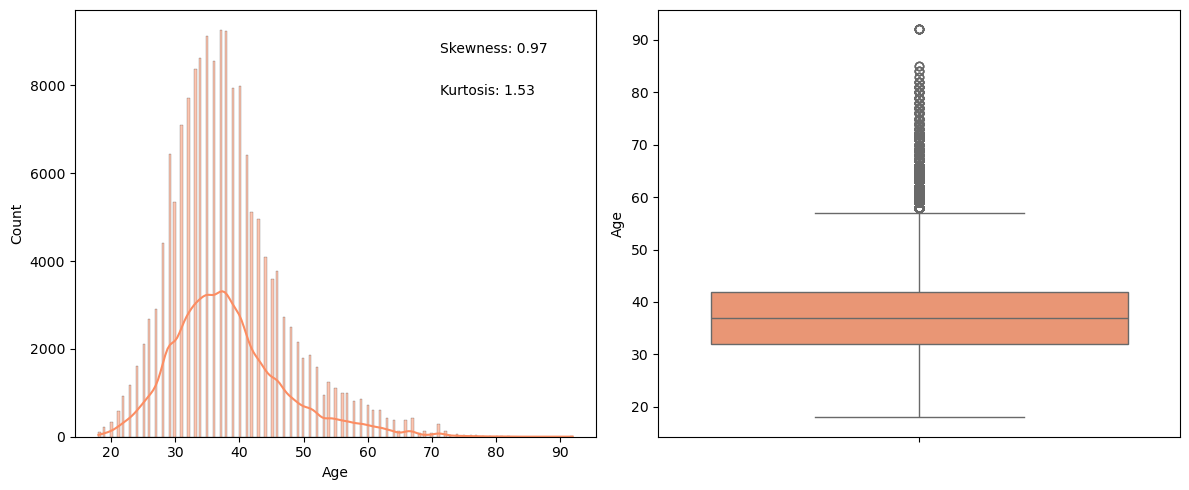

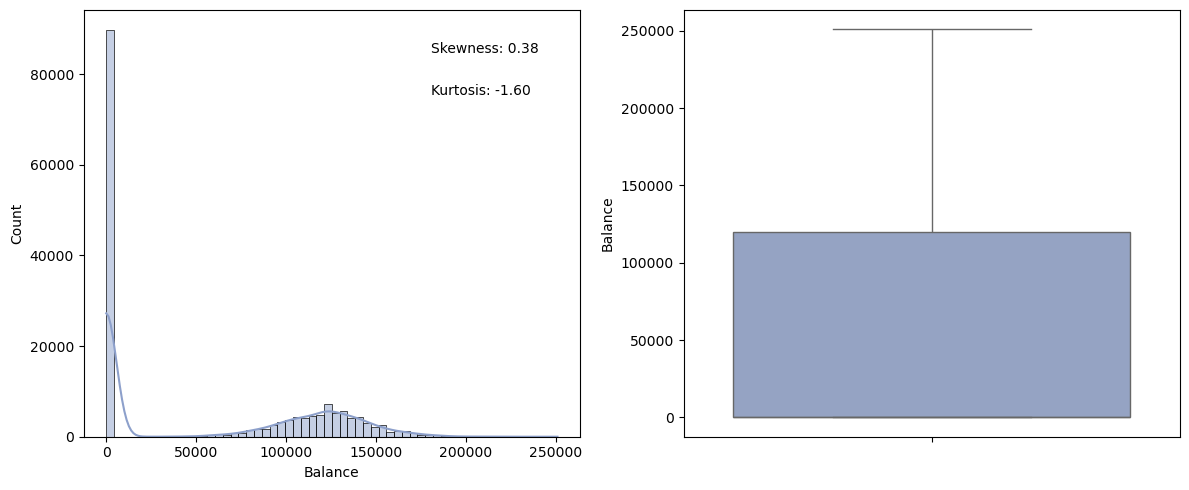

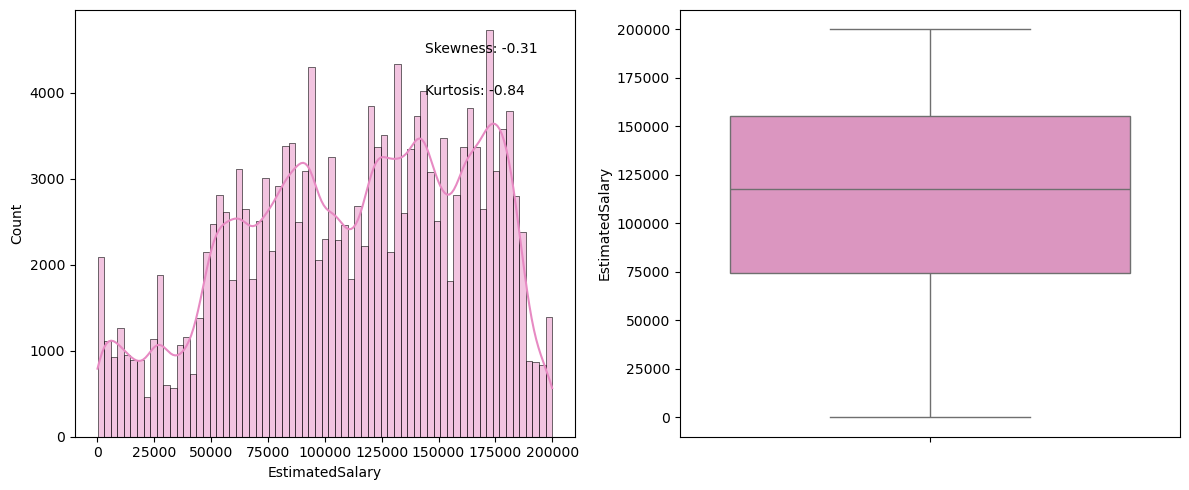

In [16]:
custom_palette = sns.color_palette("Set2", n_colors=4)

for i, (col, color) in enumerate(zip(continuous_features, custom_palette)):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df_train[col], kde=True, ax=axes[0], color=color)
    skewness = skew(df_train[col])
    kurt = kurtosis(df_train[col])
    axes[0].text(0.70, 0.9, f'Skewness: {skewness:.2f}', transform=axes[0].transAxes)
    axes[0].text(0.70, 0.8, f'Kurtosis: {kurt:.2f}', transform=axes[0].transAxes)
    sns.boxplot(df_train[col], ax=axes[1], color=color)
    plt.tight_layout()
    plt.savefig(f'figures/{col}_distribution.png')
    plt.show()

&emsp;**Observations**
> - `CreditScore` has normal distribution, but contains outlier.
>
> - `Age` distributed right skewed with high kurtosis and also contains outliers.
>
> - `Balance` has bimodal shape because more than 50% customers having 0 balance.
> No oultier found in this column.
>
> - `EstimatedSalary` of most customers between 75k to 150k.
> No outlier found in this column and no clear shape of distribution.

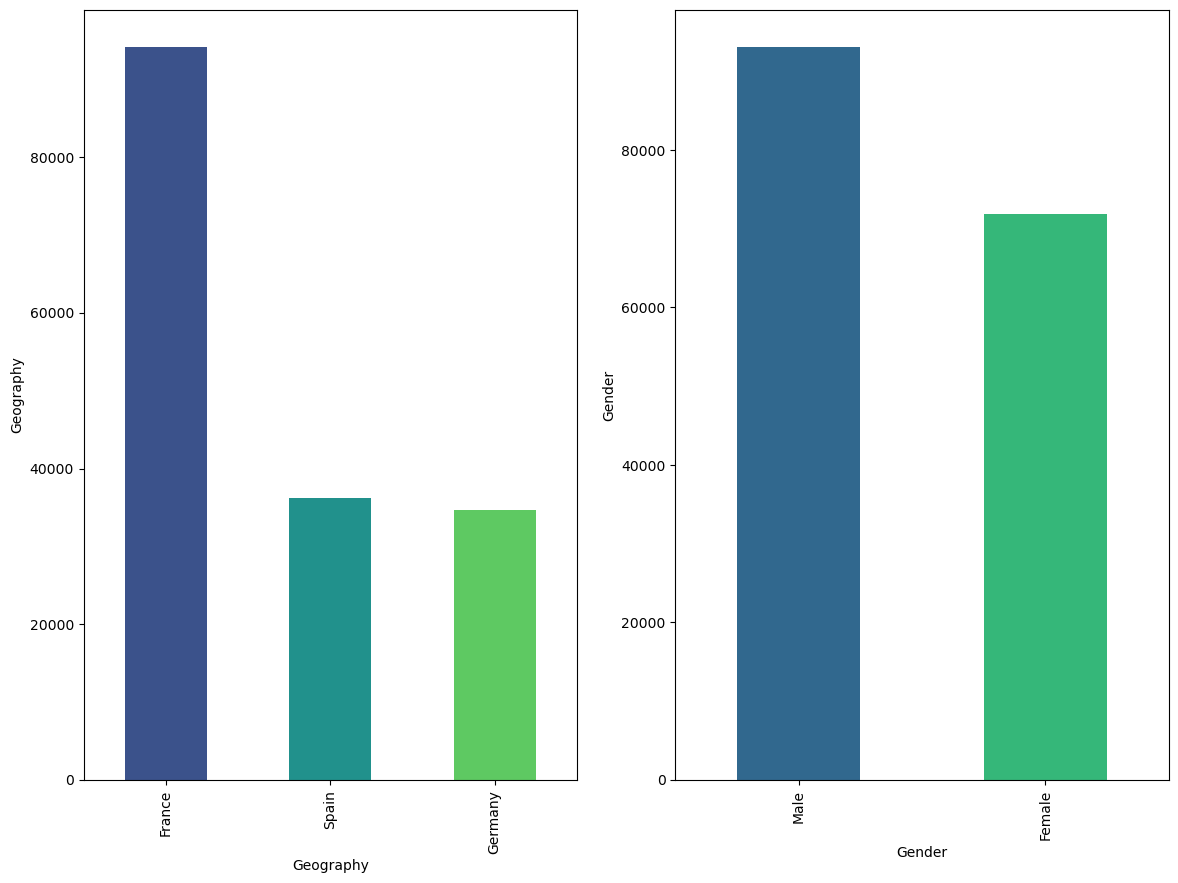

In [17]:
# make count plot for all the categorical columns as subplots in a single figure
plt.figure(figsize=(14,10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 2, i)
    colors = sns.color_palette("viridis", len(df_train[col].unique()))  # Generate a color palette
    df_train[col].value_counts().plot(kind='bar', color=colors)
    plt.ylabel(col)
plt.savefig('figures/categorical_columns_countplot.png')
plt.show()


&emsp;**Plot the Countplots of the Categorical Numeric Features**

In [18]:
discrete_features = ['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

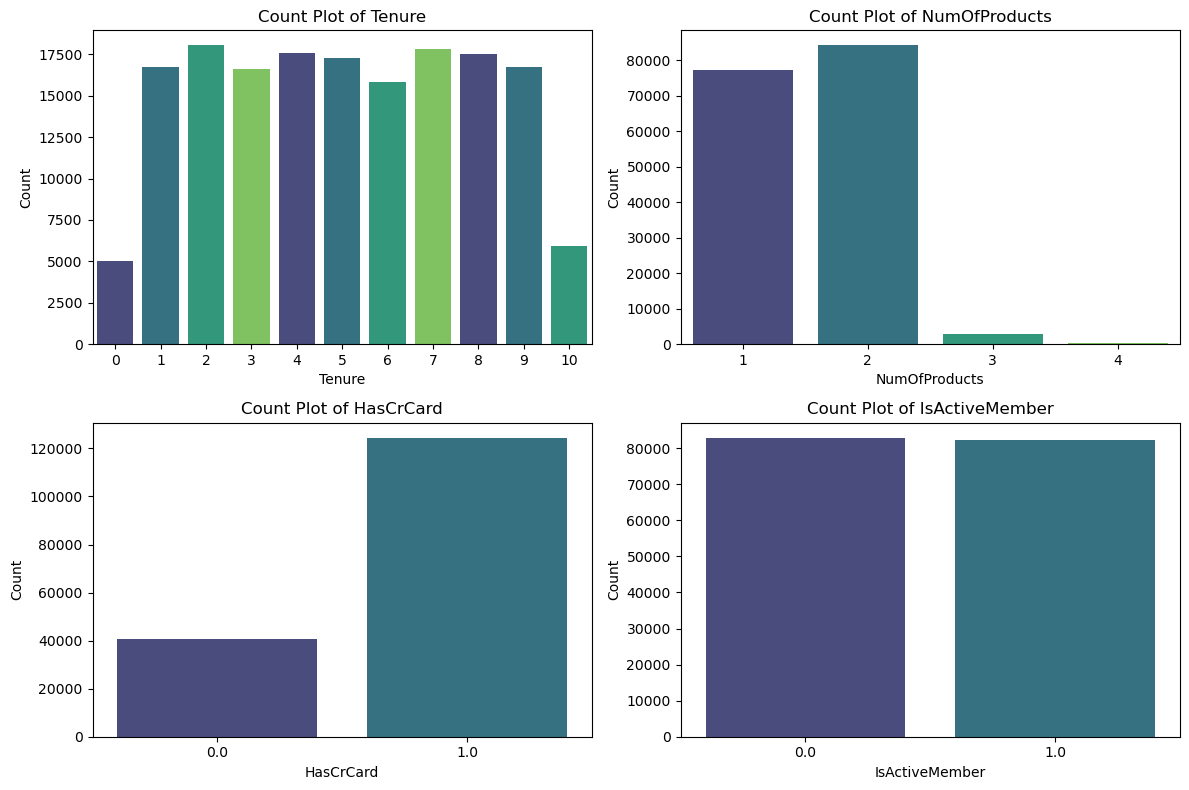

In [19]:
# Set the number of columns and rows for subplots
num_cols = 2
num_rows = len(discrete_features) // num_cols + len(discrete_features) % num_cols

# Create a custom color palette
custom_palette = sns.color_palette("viridis", len(df_train[discrete_features].columns))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4*num_rows))

# Flatten the axes array to facilitate indexing
axes = axes.flatten()

# Loop through each discrete feature and plot the count plot
for i, feature in enumerate(discrete_features):
    sns.countplot(x=feature, data=df_train, ax=axes[i], palette=custom_palette)
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.savefig('figures/discrete_features_countplot.png')
plt.show()

&emsp;**Observations**
> - The `numbers of customers` w.r.t `retention-duration` in year (1 to 9 years) are `almost equal`.
>
> - Most of the customers uses `at least two` bank products.
>
> - Most of the customers `have the credit cards`.
>
> - The number of `active & non-active` customers are almost equal.

&emsp;**Plot the Pie Charts of the Categorical Object Features**

In [20]:
categorical_features = ['Geography', 'Gender']

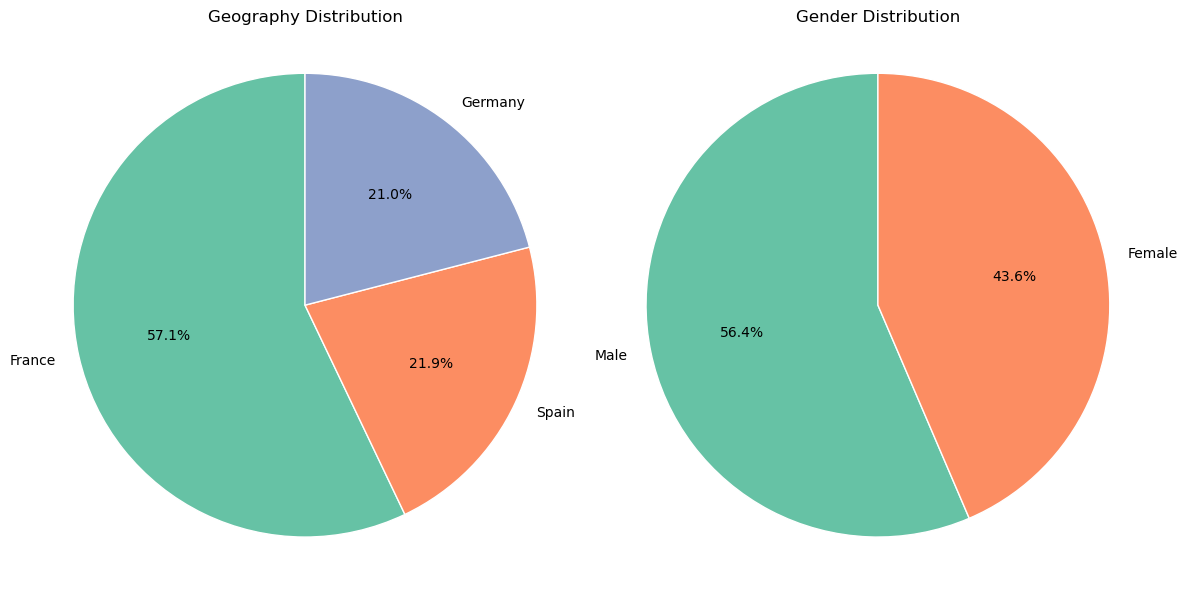

In [21]:
geography_counts = df_train['Geography'].value_counts()

# set the color palette other than viridis
custom_palette = sns.color_palette("Set2", n_colors=3)

# create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# plot the pie chart of 'Geography'
axes[0].pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', 
            startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=custom_palette)
axes[0].set_title('Geography Distribution')
axes[0].axis('equal')

# plot the pie chart of 'Gender'
gender_counts = df_train['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
            startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, colors=custom_palette)
axes[1].set_title('Gender Distribution')
axes[1].axis('equal')

# adjust the layout and show the plots
plt.tight_layout()
plt.savefig('figures/categorical_features_piechart.png')
plt.show()

&emsp;**Study the Categorical Features w.r.t Target Feature**

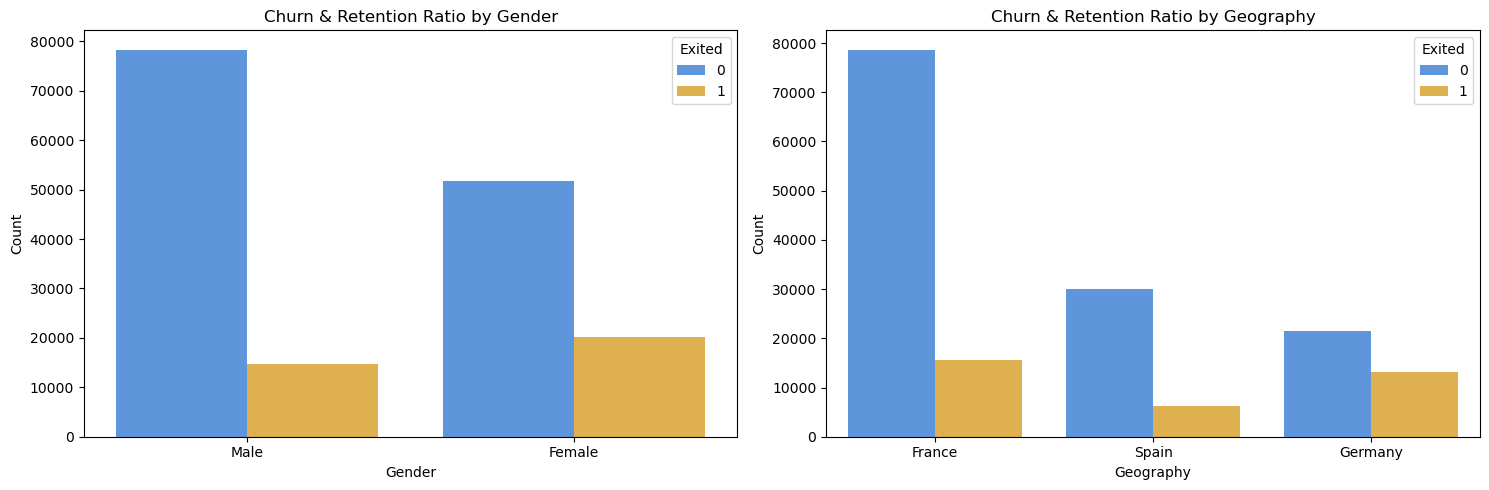

In [22]:
colors = ['#4992F0', '#F7B838', '#11FFFD', '#FF00DC', 'purple']

# Select three categorical features
categorical_features = ['Gender', 'Geography']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=df_train, palette=colors, ax=axes[i])
    axes[i].set_title(f'Churn & Retention Ratio by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.savefig('figures/categorical_features_countplot_by_target.png')
plt.show()

### `Observations`
> - Female churn rate is higher than male churn rate.
> 
> - Most customers in the dataset belongs to the France.

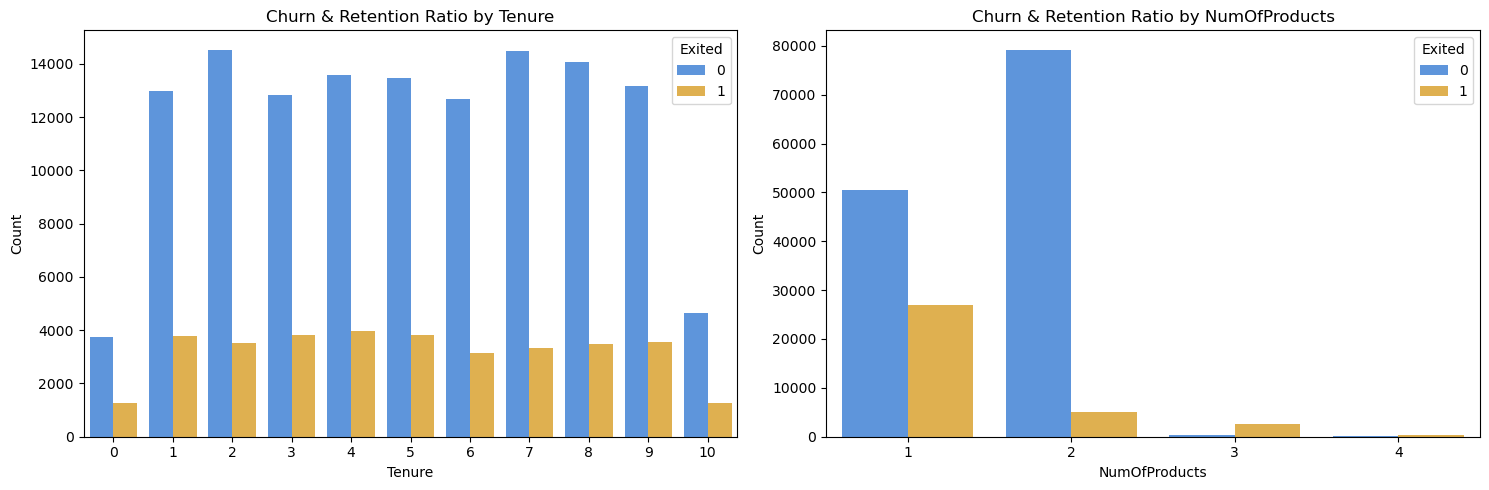

In [23]:
colors = ['#4992F0', '#F7B838', '#11FFFD']

# Select three categorical features
categorical_features = ['Tenure', 'NumOfProducts']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=df_train, palette=colors, ax=axes[i])
    axes[i].set_title(f'Churn & Retention Ratio by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.savefig('figures/categorical_features_countplot_by_target2.png')
plt.show()

### `Observations`
> - The churn rate is same every year (1 to 9 years), reduced in first & 10th years.
>
> - The churn rate is higher in those customers who use only one product.

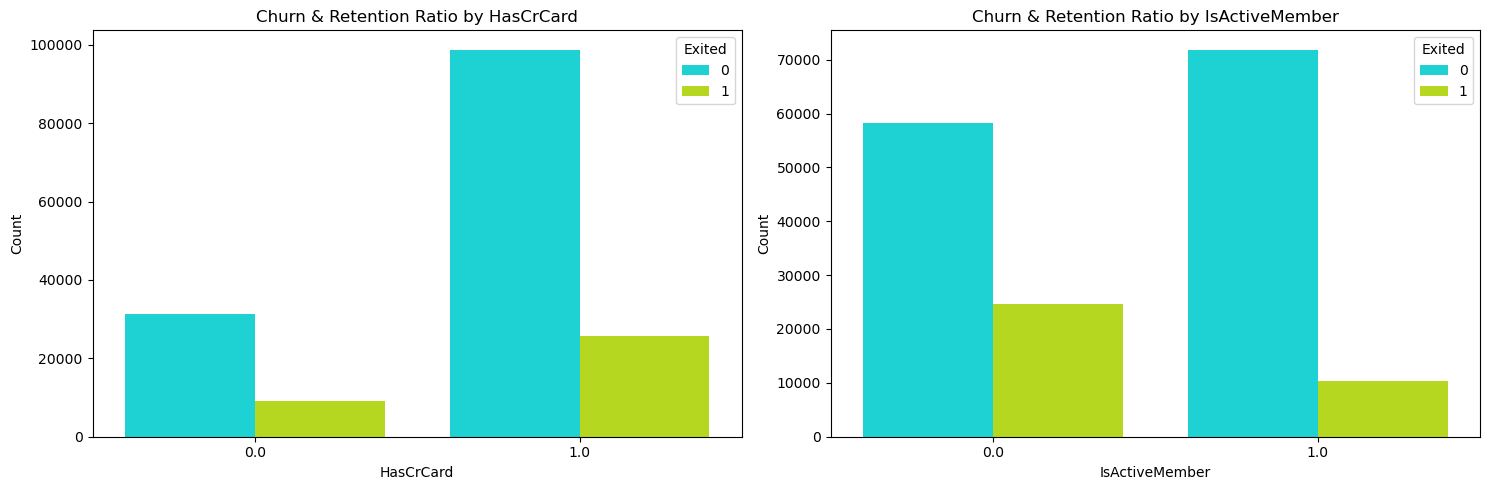

In [24]:
colors = ['#00F0F2', '#CAF600']

# Select three categorical features
categorical_features = ['HasCrCard', 'IsActiveMember']

# Create subplots
fig, axes = plt.subplots(1, len(categorical_features), figsize=(15, 5))

# Loop through each categorical feature and plot the count plot
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='Exited', data=df_train, palette=colors, ax=axes[i])
    axes[i].set_title(f'Churn & Retention Ratio by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust the layout and show the plots
plt.tight_layout()
plt.savefig('figures/categorical_features_countplot_by_target3.png')
plt.show()


### `Observations`
> - Churn rate is not related to the 'Has Credit Card or Not'.
>
> - Churn rate is high in non-active members as compared to the active members.

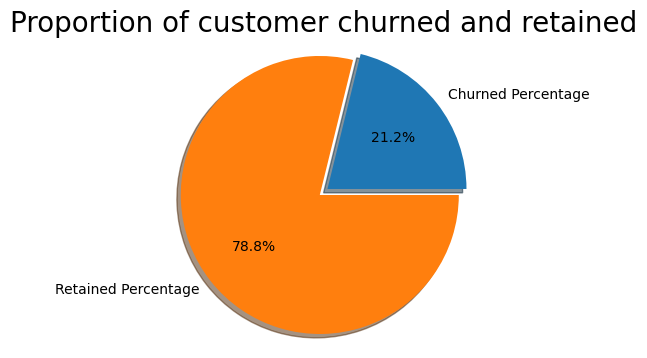

In [25]:
labels = ['Churned Percentage', 'Retained Percentage']
sizes = [df_train.Exited[df_train['Exited']==1].count(), df_train.Exited[df_train['Exited']==0].count()]
explode = (0, 0.07)
fig1, ax1 = plt.subplots(figsize=(8, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.savefig('figures/churn_retained_piechart.png')
plt.show()

### `Observations`
> - Overall curned percentage is around 21%.
>
> - Overall retention percentage is around 79%.

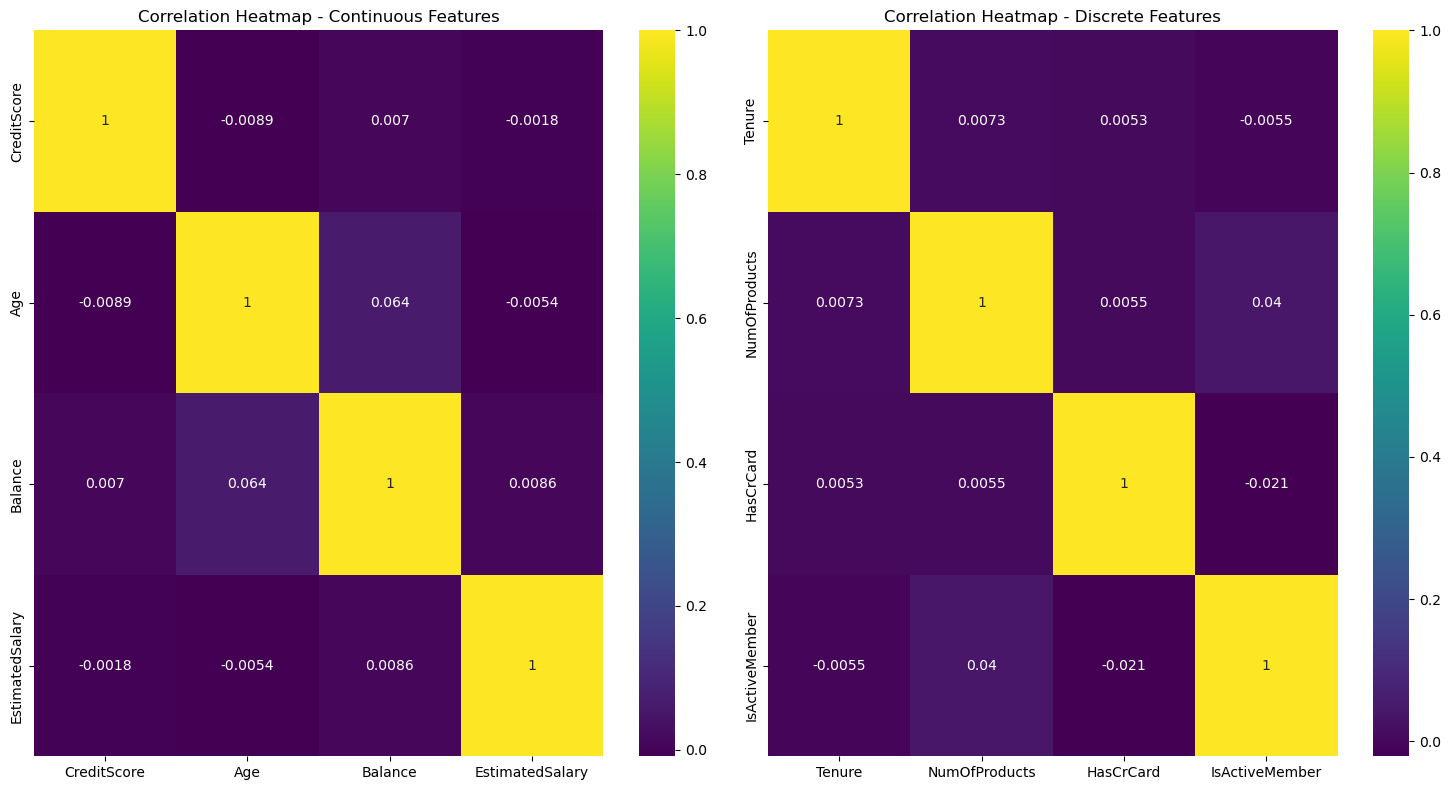

In [26]:
# make a heatmap to find the correlation between the numerical columns
plt.figure(figsize=(15, 8))

# Heatmap for continuous features
plt.subplot(1, 2, 1)
sns.heatmap(df_train[continuous_features].corr(method='pearson'), annot=True, cmap='viridis')
plt.title('Correlation Heatmap - Continuous Features')

# Heatmap for discrete features
plt.subplot(1, 2, 2)
sns.heatmap(df_train[discrete_features].corr(method='pearson'), annot=True, cmap='viridis')
plt.title('Correlation Heatmap - Discrete Features')

plt.tight_layout()
plt.savefig('figures/correlation_heatmap.png')
plt.show()

---
# **Machine Learning with Models**

1. Random Forest Classifier
2. XGBoost Classifier
3. LightGBM Classifier
4. CatBoost Classifier
5. Neural Network with PyTorch

## **Data preprocessing**

before we start with the models, we need to preprocess the data. We will use the following steps:

1. **Label Encoding**
2. **min-max scaling**

In [27]:
# laoding the dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [28]:
df_train[cat_cols].nunique()

Geography    3
Gender       2
dtype: int64

In [29]:
# encode the categorical columns using for loop
for col in cat_cols:
    label_encoder = LabelEncoder()
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])

In [30]:
# scale the continuous features with for loop using min-max scaler
scaler = MinMaxScaler()
df_train[continuous_features] = scaler.fit_transform(df_train[continuous_features])
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279,0
1,1,15749177,Okwudiliolisa,0.554,0,1,0.202703,1,0.000000,2,1.0,1.0,0.247483,0
2,2,15694510,Hsueh,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364,0
3,3,15741417,Kao,0.462,0,1,0.216216,2,0.593398,1,1.0,1.0,0.422787,0
4,4,15766172,Chiemenam,0.732,2,1,0.202703,5,0.000000,2,1.0,1.0,0.075293,0


## **Creating Functions**

#### **`To print the metrics`**

In [31]:
# Creating a dictionary to store the metrics
metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'AUROC': []}

def assigning_metric_scores(model_name, y_test, y_pred, y_pred_prob):
    model = model_name
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred_prob)
    

    metrics_dict['Model'].append(model)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Precision'].append(precision)
    metrics_dict['Recall'].append(recall)
    metrics_dict['F1 Score'].append(f1)
    metrics_dict['AUROC'].append(auroc)
    

def print_report_matrix(model_name, y_test, y_pred, y_pred_prob):
    c_report = classification_report(y_test, y_pred)
    print(f"\nClassification Report of {model_name}:\n\n{c_report}")
    # print roc_auc_score
    auroc = roc_auc_score(y_test, y_pred_prob)
    print(f"\nAUROC Score of {model_name}: {auroc:.2f}")
      

    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'figures/{model_name}_confusion_matrix.png')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name} ROC Curve: (AUC_score = {auroc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.savefig(f'figures/{model_name}_roc_curve.png')
    plt.show()

In [32]:
# # Creating a dictionary to store the metrics
# metrics_dict = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

# def assigning_metric_scores(model_name, y_test, y_pred):
#     model = model_name
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)

#     metrics_dict['Model'].append(model)
#     metrics_dict['Accuracy'].append(accuracy)
#     metrics_dict['Precision'].append(precision)
#     metrics_dict['Recall'].append(recall)
#     metrics_dict['F1 Score'].append(f1)

# def print_report_matrix(model_name, y_test, y_pred):
#     c_report = classification_report(y_test, y_pred)
#     print(f"\nClassification Report of {model_name}:\n\n{c_report}")

#     conf_matrix = confusion_matrix(y_test, y_pred)
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
#     plt.title(f'{model_name} Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.savefig(f'figures/{model_name}_confusion_matrix.png')
#     plt.show()

### To encode and scale the data and apply the model

In [33]:
# create a function to apply the model to the dataset
def apply_ml_model(model, df):
    X = df_train.drop(['Exited', 'Surname', 'CustomerId'], axis=1)
    y = df_train['Exited']

    cat_cols = ['Geography', 'Gender']
    continue_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

    # Apply label encoder to the categorical columns
    le = LabelEncoder()
    X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col))

    # apply min max scaler to the continuous features
    scaler = MinMaxScaler()
    X[continue_features] = scaler.fit_transform(X[continue_features])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_name = type(model).__name__
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # create submission file
    df_submission['Exited'] = model.predict(df_test.drop(['Surname', 'CustomerId'], axis=1))
    df_submission.to_csv(f'submissions_{model_name}.csv', index=False)
    
    assigning_metric_scores(model_name, y_test, y_pred, y_pred_prob)
    print_report_matrix(model_name, y_test, y_pred, y_pred_prob)

# 1. `Random Forest Classifier`


Classification Report of RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26052
           1       0.74      0.52      0.61      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.73      0.76     33007
weighted avg       0.85      0.86      0.85     33007


AUROC Score of RandomForestClassifier: 0.88


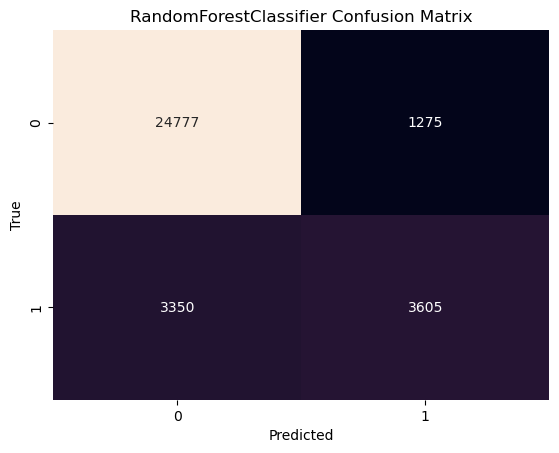

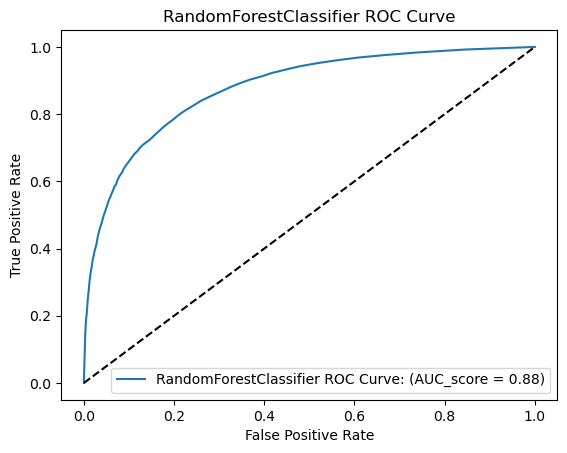

In [34]:
apply_ml_model(RandomForestClassifier(random_state=42, class_weight='balanced'), df_train)

# 2. `Extreme Gradient Boosting (XGBoost) Classifier`


Classification Report of XGBClassifier:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.74      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.81      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007


AUROC Score of XGBClassifier: 0.89


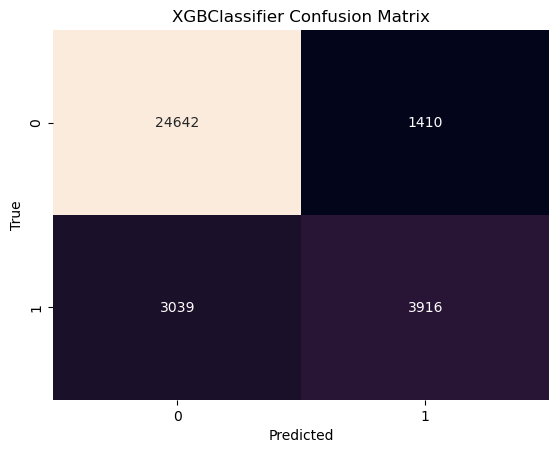

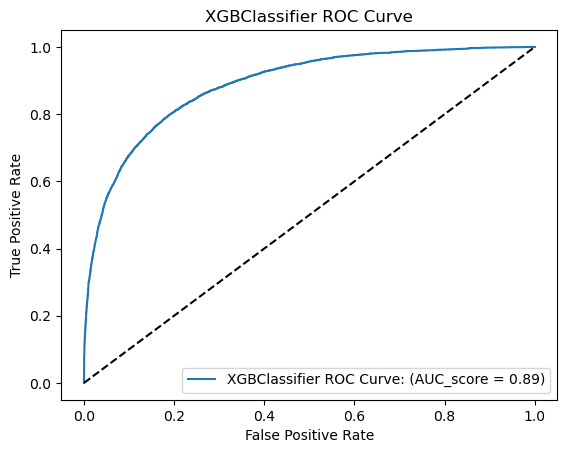

In [35]:
apply_ml_model(XGBClassifier(random_state=42), df_train)

# 3. `CATBoost Classifier`


Classification Report of CatBoostClassifier:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007


AUROC Score of CatBoostClassifier: 0.89


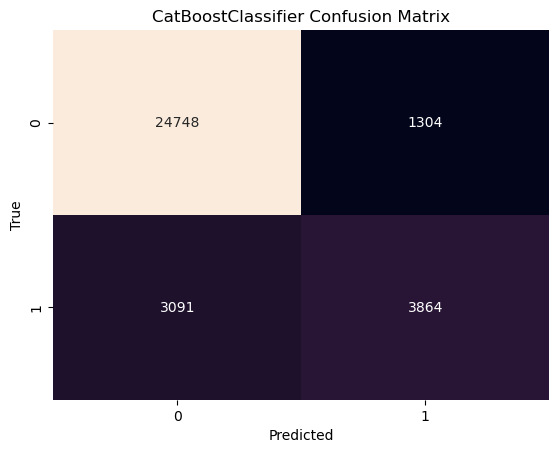

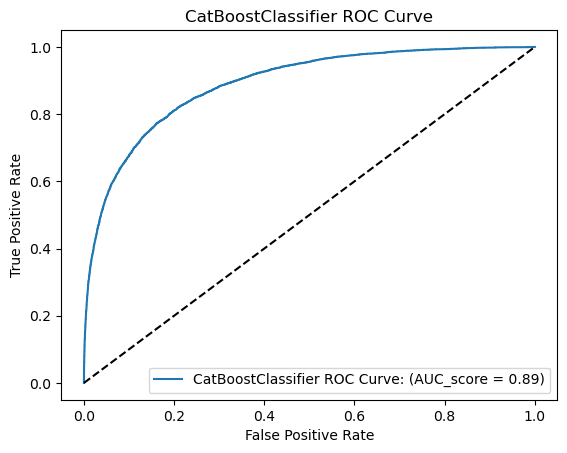

In [36]:
apply_ml_model(CatBoostClassifier(random_state=42, verbose=False), df_train)

# 4. `LightGBM Classifier`


Classification Report of LGBMClassifier:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     26052
           1       0.75      0.56      0.64      6955

    accuracy                           0.87     33007
   macro avg       0.82      0.75      0.78     33007
weighted avg       0.86      0.87      0.86     33007


AUROC Score of LGBMClassifier: 0.89


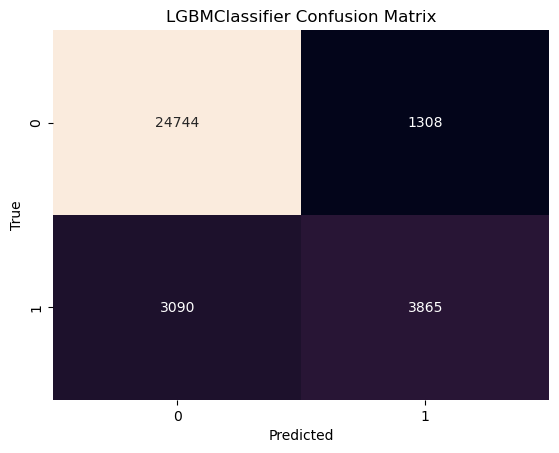

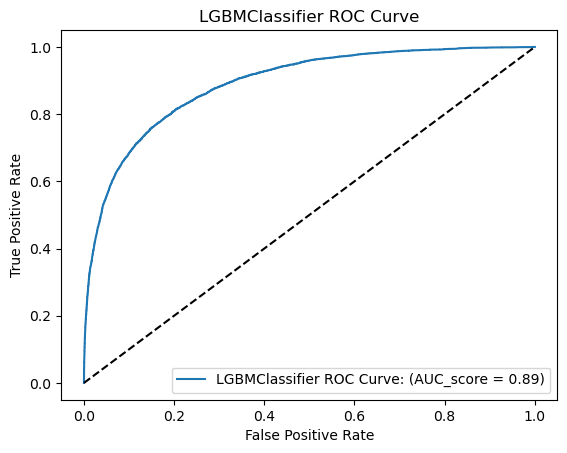

In [37]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
apply_ml_model(LGBMClassifier(random_state=42, **params, verbose=-1), df_train)

# `Comparing all the models`

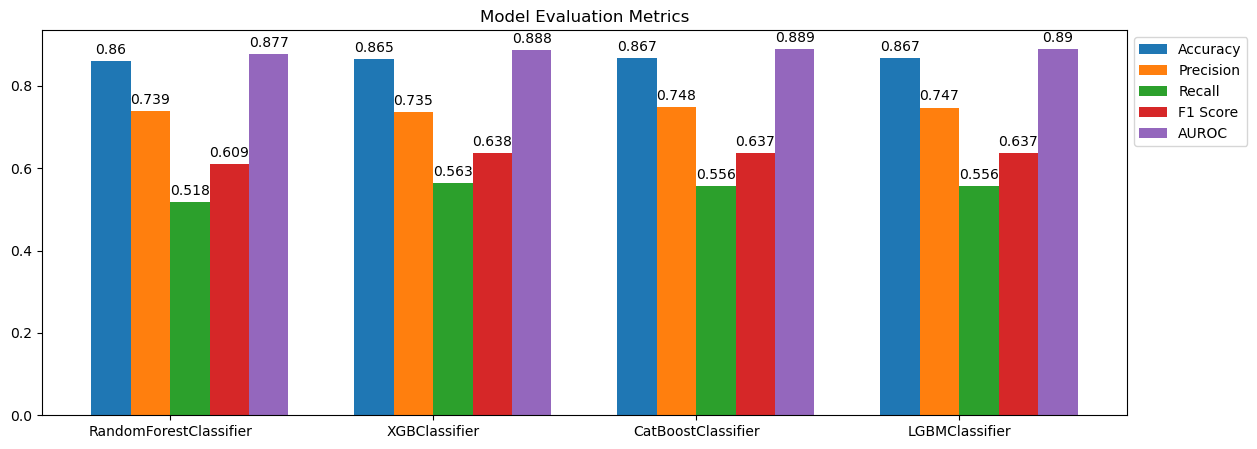

+------------------------+------------+-------------+----------+------------+----------+
| Model                  |   Accuracy |   Precision |   Recall |   F1 Score |    AUROC |
+========================+============+=============+==========+============+==========+
| RandomForestClassifier |   0.859878 |    0.73873  | 0.518332 |   0.60921  | 0.877479 |
+------------------------+------------+-------------+----------+------------+----------+
| XGBClassifier          |   0.86521  |    0.735261 | 0.563048 |   0.637733 | 0.887652 |
+------------------------+------------+-------------+----------+------------+----------+
| CatBoostClassifier     |   0.866846 |    0.747678 | 0.555572 |   0.637466 | 0.889488 |
+------------------------+------------+-------------+----------+------------+----------+
| LGBMClassifier         |   0.866756 |    0.747149 | 0.555715 |   0.637368 | 0.89015  |
+------------------------+------------+-------------+----------+------------+----------+


In [38]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(14, 5))

bar_width = 0.15
bar_positions = np.arange(len(metrics_dict['Model']))

for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUROC']):
    bars = ax.bar(bar_positions + i * bar_width, metrics_dict[metric], bar_width, label=metric)
    
    # Display values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

    ax.set_xticks(bar_positions + 1.5 * bar_width)
    ax.set_xticklabels(metrics_dict['Model'])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Model Evaluation Metrics')
plt.savefig('figures/model_evaluation_metrics.png')
plt.show()

# Create a list of lists to store the scores
scores = []
for i in range(len(metrics_dict['Model'])):
    model = metrics_dict['Model'][i]
    accuracy = metrics_dict['Accuracy'][i]
    precision = metrics_dict['Precision'][i]
    recall = metrics_dict['Recall'][i]
    f1_score = metrics_dict['F1 Score'][i]
    auroc = metrics_dict['AUROC'][i]
    
    scores.append([model, accuracy, precision, recall, f1_score, auroc])

# Define the headers for the table
headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUROC']

# Print the scores in a tabulated form
print(tabulate(scores, headers=headers, tablefmt='grid'))

### **Observations**
> - The `CATboost` and `lightGBM` models have the highest `accuracy` and `XGBoost` has highest `f1-score` among all the models.

## Pytorch and NN

In [39]:
# laoding the dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_submission = pd.read_csv('data/sample_submission.csv')
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [40]:
df_train.columns 

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [41]:
# select features and target from the dataset
X_train = df_train.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y_train = df_train['Exited']

# encode the categorical columns using for loop
for col in cat_cols:
    label_encoder = LabelEncoder()
    X_train[col] = label_encoder.fit_transform(X_train[col])

# scale the continuous features with for loop using min-max scaler
scaler = MinMaxScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

X_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279
1,0.554,0,1,0.202703,1,0.000000,2,1.0,1.0,0.247483
2,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364
3,0.462,0,1,0.216216,2,0.593398,1,1.0,1.0,0.422787
4,0.732,2,1,0.202703,5,0.000000,2,1.0,1.0,0.075293


In [42]:
X_test = df_test.drop(['id','CustomerId', 'Surname'], axis=1)
# encode and scale the features in test dataset
for col in cat_cols:
    label_encoder = LabelEncoder()
    X_test[col] = label_encoder.fit_transform(X_test[col])
X_test[continuous_features] = scaler.fit_transform(X_test[continuous_features])
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.472,0,0,0.067568,2,0.000000,2,0.0,1.0,0.804903
1,0.666,0,0,0.378378,2,0.000000,1,1.0,0.0,0.362723
2,0.612,0,0,0.216216,7,0.000000,2,1.0,0.0,0.694419
3,0.662,0,1,0.243243,8,0.000000,1,1.0,0.0,0.569654
4,0.804,1,1,0.270270,10,0.483318,1,1.0,0.0,0.697164


In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Example usage:
input_size = 10
hidden_size = 20
output_size = 1

model = SimpleNeuralNetwork(input_size, hidden_size, output_size)
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')
model.to(device)
# print the model to device
print(f'The model is moved to {device}')
print(model)

The model is moved to mps
SimpleNeuralNetwork(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### `Data Loader`
This will make it easier to feed the data into the model.

Epoch 1/200, Train Loss: 0.6440, Train Accuracy: 0.7366, ------------ Val Loss: 0.5284, Val Accuracy: 0.7893
Epoch 2/200, Train Loss: 0.5296, Train Accuracy: 0.7882, ------------ Val Loss: 0.5721, Val Accuracy: 0.7893
Epoch 3/200, Train Loss: 0.5741, Train Accuracy: 0.7882, ------------ Val Loss: 0.5501, Val Accuracy: 0.7893
Epoch 4/200, Train Loss: 0.5520, Train Accuracy: 0.7882, ------------ Val Loss: 0.5178, Val Accuracy: 0.7893
Epoch 5/200, Train Loss: 0.5192, Train Accuracy: 0.7882, ------------ Val Loss: 0.5112, Val Accuracy: 0.7893
Epoch 6/200, Train Loss: 0.5121, Train Accuracy: 0.7882, ------------ Val Loss: 0.5185, Val Accuracy: 0.7893
Epoch 7/200, Train Loss: 0.5192, Train Accuracy: 0.7882, ------------ Val Loss: 0.5134, Val Accuracy: 0.7893
Epoch 8/200, Train Loss: 0.5142, Train Accuracy: 0.7882, ------------ Val Loss: 0.5019, Val Accuracy: 0.7893
Epoch 9/200, Train Loss: 0.5029, Train Accuracy: 0.7882, ------------ Val Loss: 0.4897, Val Accuracy: 0.7893
Epoch 10/200, Train

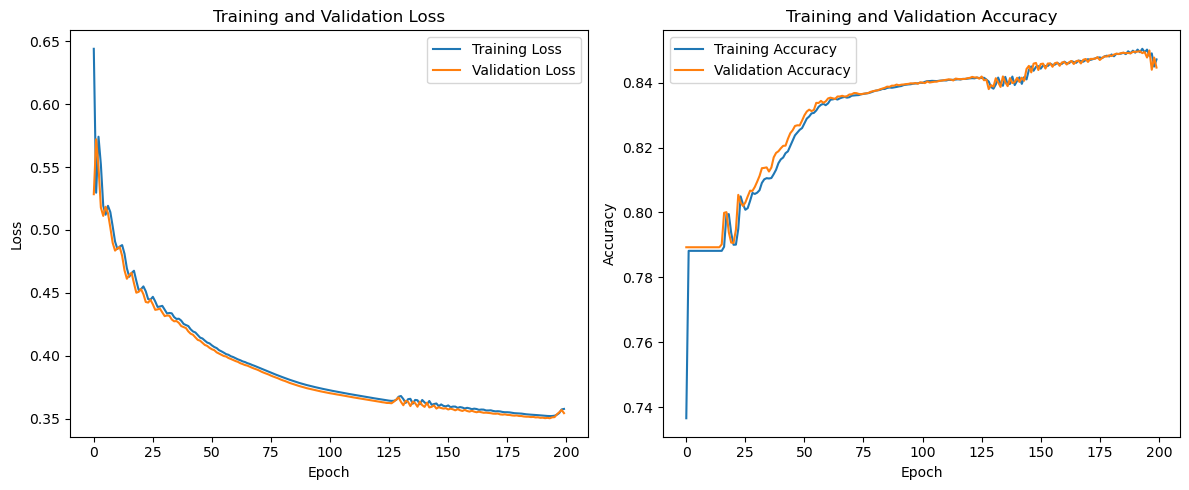

CPU times: user 5.98 s, sys: 928 ms, total: 6.91 s
Wall time: 5.85 s


In [44]:
%%time

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Convert the data to tensors to be used in the model
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)

# Define the loss function and the optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)

# Train the model
epochs = 200
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
for epoch in range(epochs):
    # Forward pass on training set
    model.train()
    y_pred_train = model(X_train_tensor)
    train_loss = criterion(y_pred_train, y_train_tensor.view(-1, 1))

    # Backward pass and update weights
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Forward pass on validation set
    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val_tensor)
        val_loss = criterion(y_pred_val, y_val_tensor.view(-1, 1))

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train.round().cpu().detach().numpy())
    val_accuracy = accuracy_score(y_val, y_pred_val.round().cpu().detach().numpy())

    # Append losses and accuracies to lists
    train_losses.append(train_loss.item())
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy)

    # Print progress
    if epoch % 1 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, ------------ Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

# Plot training and validation losses and accuracies
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training and validation losses
axes[0].plot(range(epochs), train_losses, label='Training Loss')
axes[0].plot(range(epochs), val_losses, label='Validation Loss')
axes[0].legend()
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')

# Plot training and validation accuracies
axes[1].plot(range(epochs), train_accuracies, label='Training Accuracy')
axes[1].plot(range(epochs), val_accuracies, label='Validation Accuracy')
axes[1].legend()
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Accuracy')

plt.tight_layout()
plt.savefig('figures/training_validation_loss_accuracy_ANN.png')
plt.show()

The AUC score is 0.8678


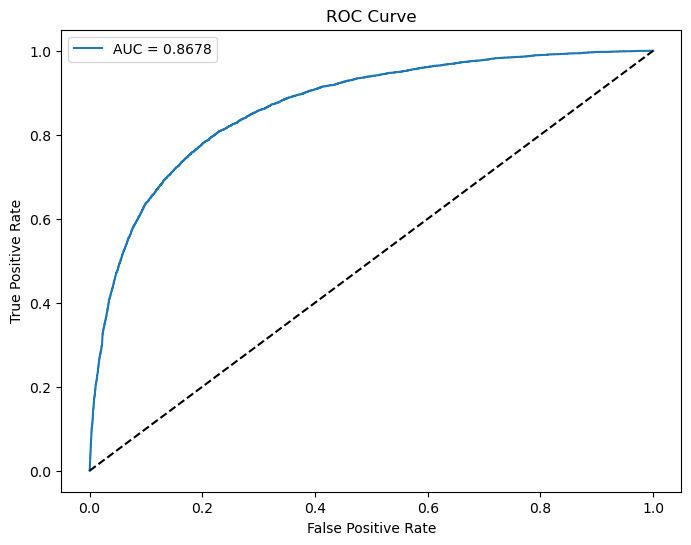

In [45]:
# compute AUROC score and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Compute the probabilities of the positive class
model.eval()
with torch.no_grad():
    y_pred = model(X_val_tensor)
    y_pred = y_pred.cpu().detach().numpy()

# Compute the fpr and tpr
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Compute the AUC score
auc_score = auc(fpr, tpr)
print(f'The AUC score is {auc_score:.4f}')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('figures/roc_curve_ANN.png')
plt.show()

# Create submision file

In [46]:
# convert the test data to tensor
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# make predictions
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred = y_pred.round().cpu().numpy().astype(int)

# create a dataframe to store the predictions
df_submission['Exited'] = y_pred
df_submission.head()

# save the predictions to a csv file
df_submission.to_csv('submission_ANN.csv', index=False)

---

<h1 style="font-family: 'poppins'; font-weight: bold; color: Orange;">👨‍💻Author: Dr. Muhammad Aamamr Tufail</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/AammarTufail) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadaammartufail) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/dr-muhammad-aammar-tufail-02471213b/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@codanics) 
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/aammar.tufail) 
[![TikTok](https://img.shields.io/badge/TikTok-Profile-black?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@draammar)  

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://twitter.com/aammar_tufail) 
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/aammartufail/) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:aammar@codanics.com)

---